In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import h5py

%matplotlib inline

/Users/nicolasdrizard/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [6]:
train_perp = [1038.2,601.86,527.43,478.24,441.1,411.9,388.22,368.57,351.92,337.53,324.88,313.59,303.42,294.15,285.66,289.63,287.61,286.44,285.45,284.5,274.63,267.31,260,254.65,248.9,243.5,238.5]
valid_txt_perp = [639.06,544.09,490.41,451.28,421.14,397.32,377.9,361.76,348.08,336.26,325.90,316.70,308.46,301.02,294.251,298.53,298.16,297.6, 297,296.4,285.712,279,274,270.11,265.7,261.6,257.8]
kagg_perp = [8.00,7.54,7.31,7.13,6.97,6.84,6.72,6.62,6.53,6.45,6.38,6.31,6.25,6.19,6.14,6.16,6.15,6.15,6.15,6.14,6.07,6.02,5.98,5.94,5.9,5.86,5.8]

In [7]:
sns.set_style("darkgrid")

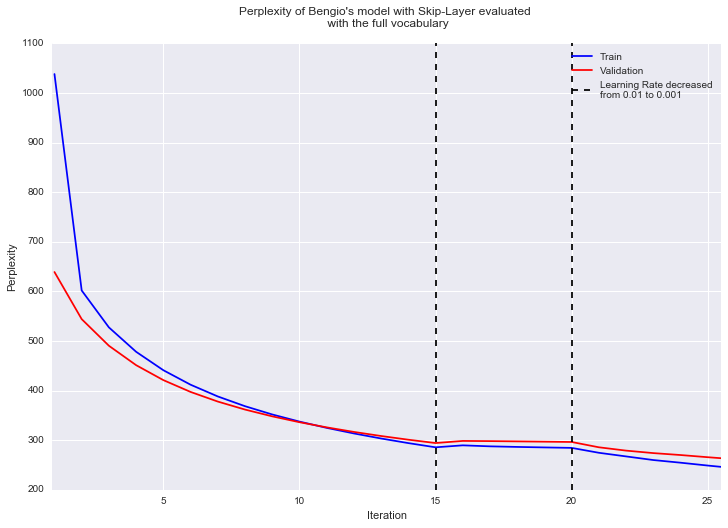

In [23]:
plt.figure(figsize=(12,8))
plt.plot(range(1,28),train_perp,color = 'blue', label = 'Train')
plt.plot(range(1,28),valid_txt_perp, color = 'red', label = 'Validation')
plt.axvline(15, color='k', linestyle='--',label='Learning Rate decreased\nfrom 0.01 to 0.001')
plt.axvline(20, color='k', linestyle='--')
plt.xlim(0.9,25.5)
plt.xlabel('Iteration')
plt.ylabel('Perplexity')
plt.title("Perplexity of Bengio's model with Skip-Layer evaluated \n with the full vocabulary\n")
plt.legend(loc = 1)
plt.show()

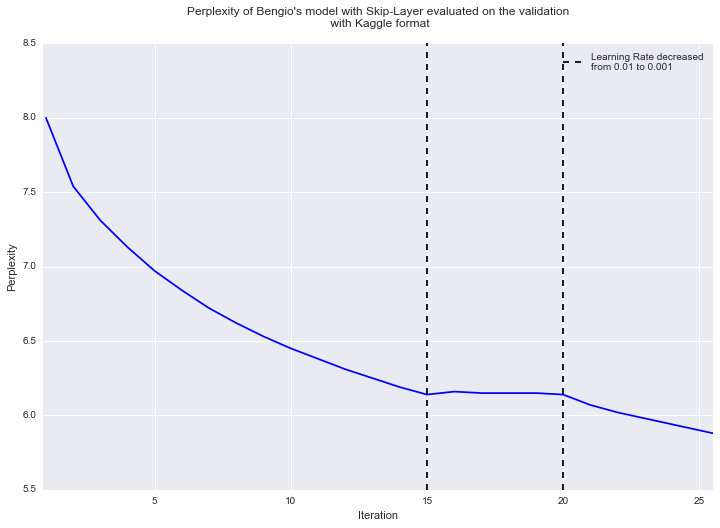

In [26]:
plt.figure(figsize=(12,8))
plt.plot(range(1,28),kagg_perp,color = 'blue')
plt.axvline(15, color='k', linestyle='--',label='Learning Rate decreased\nfrom 0.01 to 0.001')
plt.axvline(20, color='k', linestyle='--')
plt.xlim(0.9,25.5)
plt.ylim(5.5,8.5)
plt.xlabel('Iteration')
plt.ylabel('Perplexity')
plt.title("Perplexity of Bengio's model with Skip-Layer evaluated on the validation\n with Kaggle format\n")
plt.legend(loc = 1)
plt.show()

In [14]:
with h5py.File('bengio_2_perp.f5','r') as hf:
    print('List of arrays in this file: \n', hf.keys())
    perptxt = hf.get('test')
    perpval = hf.get('valid')
    perptxt = np.array(perptxt)
    perpval = np.array(perpval)

('List of arrays in this file: \n', [u'test', u'valid'])


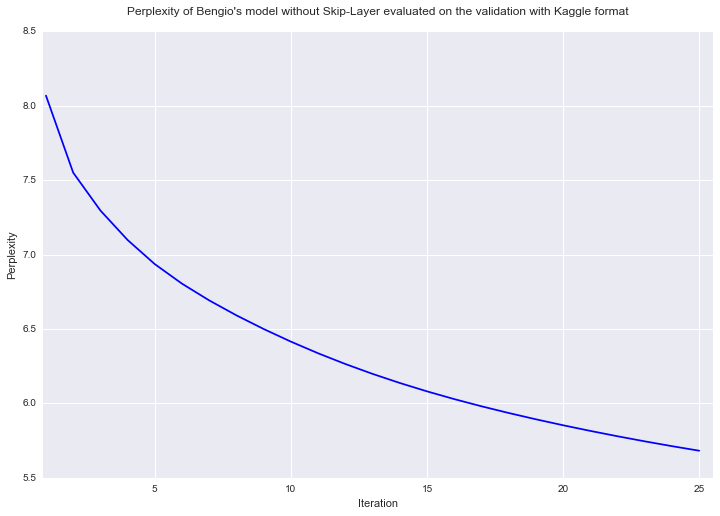

In [32]:
plt.figure(figsize=(12,8))
plt.plot(range(1,26),perpval,color = 'blue')
plt.xlim(0.9,25.5)
plt.xlabel('Iteration')
plt.ylabel('Perplexity')
plt.title("Perplexity of Bengio's model without Skip-Layer evaluated on the validation with Kaggle format\n")
plt.show()

In [30]:
tr = [1082,625,542,488,450,420,396,377,360,346,334,322,312,303,294,286,279,272,266,260,254,249,244,239,235]
print len(tr)

25


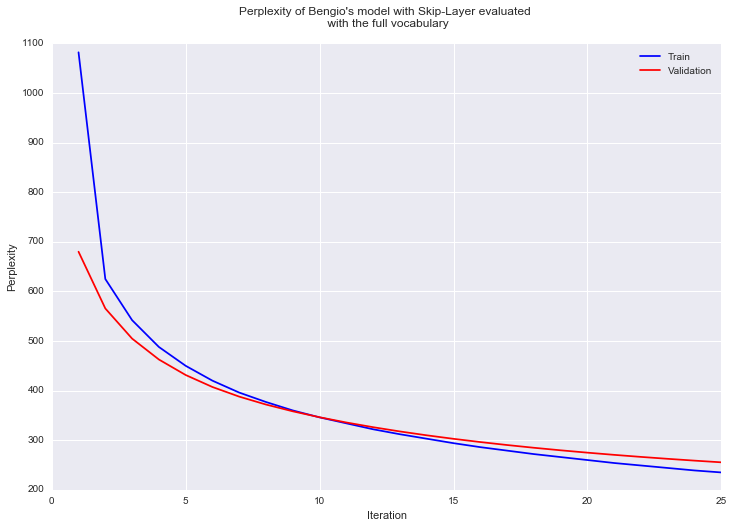

In [33]:
plt.figure(figsize=(12,8))
plt.plot(range(1,26),tr,color = 'blue', label = 'Train')
plt.plot(range(1,26),perptxt, color = 'red', label = 'Validation')
plt.xlabel('Iteration')
plt.ylabel('Perplexity')
plt.title("Perplexity of Bengio's model with Skip-Layer evaluated \n with the full vocabulary\n")
plt.legend(loc = 1)
plt.show()

In [13]:
perpval

array(None, dtype=object)

# Count Based Models

/Users/nicolasdrizard/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


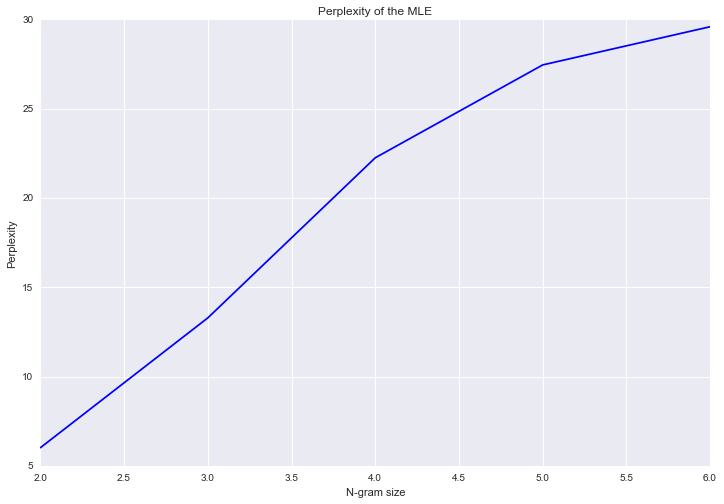

In [5]:
# Ngram
perp_ngram = [6.0175980155407, 13.28732636328 , 22.251027697101, 27.450362864125, 29.58888838757]

plt.figure(figsize=(12,8))
plt.plot(range(2,7),perp_ngram,color = 'blue')
plt.xlabel('N-gram size')
plt.ylabel('Perplexity')
plt.title("Perplexity of the MLE")
plt.legend(loc = 1)
plt.show()

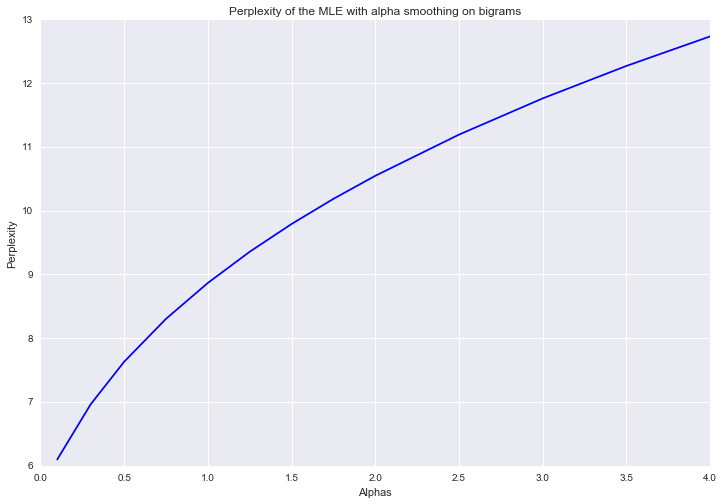

In [6]:
# Alphas
alphas = [0.1, 0.3, 0.5, 0.75   , 1  , 1.25   , 1.5, 1.75   , 2  , 2.5, 3  , 3.5, 4 ]
perp_alpha = [6.0993607062201,6.9655684072518,7.6324384202199,8.3053093403733,8.8680603647573,9.356980060931 ,9.7921977002656,10.186200778425,10.547348064751,11.193165765609,11.76118399367 ,12.270407717032,12.733309413068 ]

plt.figure(figsize=(12,8))
plt.plot(alphas,perp_alpha,color = 'blue')
plt.xlabel('Alphas')
plt.ylabel('Perplexity')
plt.title("Perplexity of the MLE with alpha smoothing on bigrams")
plt.legend(loc = 1)
plt.show()

In [27]:
# alpha 0.5
perp_1 = [3.665925116785 , 3.580745717773 , 3.6130209100897, 3.6486813623685, 3.6832312467878]

# alpha 2
perp_2 = [3.6459405346812 , 3.5606954870435 , 3.5927414558571 , 3.6281922065569 , 3.6625449946136]

# alpha 4
perp_3 = [3.6294345802689, 3.5439082070843, 3.5757423546055, 3.6110134059675, 3.6451996627563]

# alpha 8
perp_4 = [3.6114882746814,3.5251646682507,3.5567202044658,3.5917818660343, 3.6257789629443]

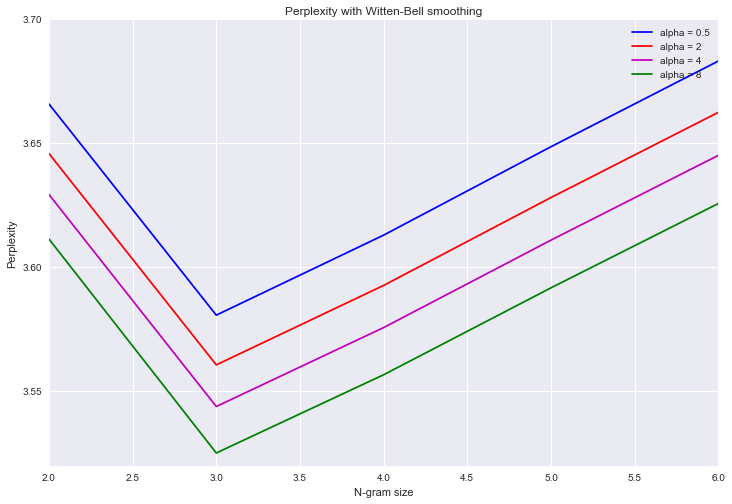

In [28]:
plt.figure(figsize=(12,8))
plt.plot(range(2,7),perp_1, color = 'blue', label = 'alpha = 0.5')
plt.plot(range(2,7),perp_2, color = 'r', label = 'alpha = 2')
plt.plot(range(2,7),perp_3, color = 'm', label = 'alpha = 4')
plt.plot(range(2,7),perp_4, color = 'g', label = 'alpha = 8')
plt.xlabel('N-gram size')
plt.ylabel('Perplexity')
plt.title("Perplexity with Witten-Bell smoothing")
plt.legend(loc = 1)
plt.show()

In [29]:
# alpha 0.5
perp_1 = [5.1296366428649, 4.4517536458966, 4.2911559318662, 4.2732916551894, 4.2828200943996]

# alpha 2
perp_2 = [5.1116447378085 ,4.4325999069104 ,4.2715410478424 ,4.2534210424176 ,4.2627911558782]

# alpha 4
perp_3 = [5.1038870531415,4.4209224433528,4.2587577691279,4.2402558842326,4.2494520654956]

# alpha 8
perp_4 = [5.1130870334539, 4.4186587936626, 4.2535865506447, 4.2342806626986, 4.2431945849258]


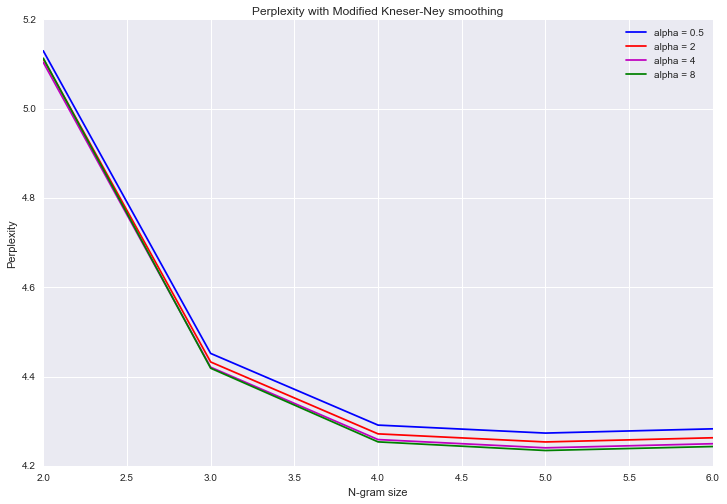

In [30]:
plt.figure(figsize=(12,8))
plt.plot(range(2,7),perp_1, color = 'blue', label = 'alpha = 0.5')
plt.plot(range(2,7),perp_2, color = 'r', label = 'alpha = 2')
plt.plot(range(2,7),perp_3, color = 'm', label = 'alpha = 4')
plt.plot(range(2,7),perp_4, color = 'g', label = 'alpha = 8')
plt.xlabel('N-gram size')
plt.ylabel('Perplexity')
plt.title("Perplexity with Modified Kneser-Ney smoothing")
plt.legend(loc = 1)
plt.show()

In [31]:
# alpha 0.5
perp_1 = [3.6720481680445,3.5847865644427,3.634142017971 ,3.6938121903914,3.7044567936109]

# alpha 2
perp_2 = [3.6524329516612,3.5651594375998,3.6141505717553,3.6737310579149,3.6843692134788]

# alpha 4
perp_3 = [3.6364627652078,3.5490116103586,3.5977027932754,3.6573253225449,3.6679844791313]

# alpha 8
perp_4 = [3.6196677849817,3.531697937992 ,3.5801027300488,3.6400376225495,3.6507809934294]

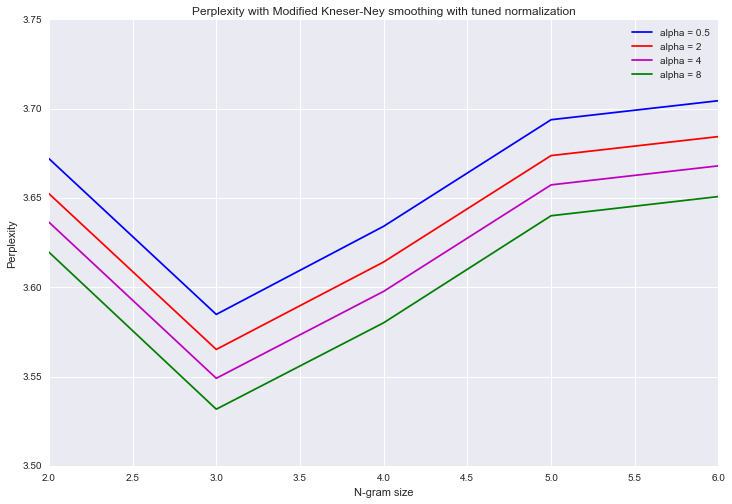

In [32]:
plt.figure(figsize=(12,8))
plt.plot(range(2,7),perp_1, color = 'blue', label = 'alpha = 0.5')
plt.plot(range(2,7),perp_2, color = 'r', label = 'alpha = 2')
plt.plot(range(2,7),perp_3, color = 'm', label = 'alpha = 4')
plt.plot(range(2,7),perp_4, color = 'g', label = 'alpha = 8')
plt.xlabel('N-gram size')
plt.ylabel('Perplexity')
plt.title("Perplexity with Modified Kneser-Ney smoothing with tuned normalization")
plt.legend(loc = 1)
plt.show()